# Convolutional neural networks

## Building

Let's build a CNN to classify images of objects.

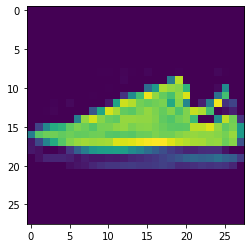

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
((X_train, y_train), (X_test, y_test)) = mnist.load_data()
plt.imshow(X_train[6]);
# It's a shoe

Let's work with the shape of the images.

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
# Because of the depth equal to 1 (it could be greater)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [4]:
X_train.shape

(60000, 28, 28, 1)

In [5]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Our model:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Training

In [10]:
model.fit(X_train, y_train, epochs=5);

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 752us/sample - loss: 0.4420 - accuracy: 0.8394
Epoch 2/5
60000/60000 [==============================] - 46s 764us/sample - loss: 0.2936 - accuracy: 0.8927
Epoch 3/5
60000/60000 [==============================] - 44s 733us/sample - loss: 0.2473 - accuracy: 0.9087
Epoch 4/5
60000/60000 [==============================] - 43s 719us/sample - loss: 0.2148 - accuracy: 0.9195
Epoch 5/5
60000/60000 [==============================] - 44s 738us/sample - loss: 0.1881 - accuracy: 0.9294


How good we are:

In [11]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(loss, accuracy))

Test loss: 0.24978809965848922, Test accuracy: 0.9089999794960022


## Sanity check

An object:

In [12]:
obj = 0  # np.random.randint(0, 10)

What is that?

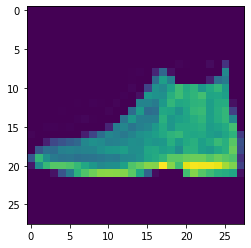

In [13]:
plt.imshow(X_test[obj].reshape(28, 28));

It's a shoe. Do we classify it correctly?

In [14]:
y_test[obj] == np.argmax(model.predict(X_test[obj].reshape(1, 28, 28, 1)))

True

## Visualizing pattern recognition 

See that the CNN extract important patterns from the image. For example, in this filter, it extracts its shape and, after, the sole and the heel:

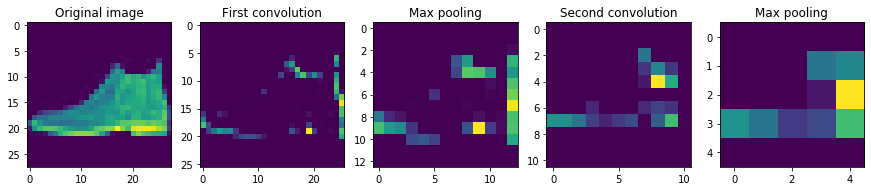

In [47]:
conv = 22  # np.random.randint(0, 64)
inputs = model.input
outputs = [layer.output for layer in model.layers]
temp_model = tf.keras.models.Model(inputs = inputs, outputs = outputs)
pred = temp_model.predict(X_test[obj].reshape(1, 28, 28, 1))

fig, axes = plt.subplots(1, 5, figsize=(15, 30))
axes[0].imshow(X_test[obj].reshape(28, 28))
axes[0].set_title('Original image')
axes[1].set_title('First convolution')
axes[2].set_title('Max pooling')
axes[3].set_title('Second convolution')
axes[4].set_title('Max pooling')
for i_layer in range(1, 5):
    axes[i_layer].imshow(pred[i_layer - 1][0, :, :, conv])
plt.show()